## Project Name - Cardiovascular Risk Prediction

## Project Summary

- The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.    
- The goal of this project is to draw insights from the data which can be used to predict CHD based on indicators.

## 1. Know your Data

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Loading Dataset

In [10]:
data = pd.read_csv('data_cardiovascular_risk.csv', index_col='id')

### Dataset First View

In [11]:
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows and Columns count

In [12]:
data.shape

(3390, 16)

### Dataset Information

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


#### Duplicate values

In [14]:
dummy = data.copy()
dummy = dummy.drop_duplicates()
print(f"Dataset shape before dropping duplicates: {data.shape}")
print(f"Dataset shape after dropping duplicates: {dummy.shape}")

Dataset shape before dropping duplicates: (3390, 16)
Dataset shape after dropping duplicates: (3390, 16)


#### Missing / Null Values

In [15]:
data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

#### Visualizing missing data

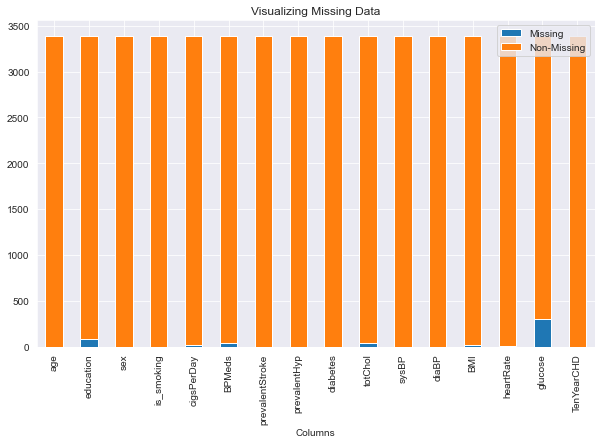

In [23]:
non_missing = data.isnull().sum().apply(lambda x: data.shape[0] - x)
missing = data.isnull().sum()
missing_df = pd.concat([missing, non_missing], axis=1).reset_index()
missing_df.columns = ["Columns", "Missing", "Non-Missing"]
missing_df.plot.bar(x='Columns', stacked=True, figsize=(10, 6))
plt.title("Visualizing Missing Data")
plt.show()

## 2. Understanding Variables

### Dataset Description

In [7]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Dataset Columns

In [25]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## 3. Data Wrangling

### Grouping data by TenYearCHD risk

In [178]:
data.groupby('TenYearCHD').mean().T

TenYearCHD,0,1
age,48.728031,54.129159
sex,0.415075,0.532290
is_smoking,0.490448,0.538160
cigsPerDay,8.670719,10.925636
BPMeds,0.023272,0.064579
prevalentStroke,0.004168,0.019569
prevalentHyp,0.282737,0.499022
diabetes,0.018757,0.064579
totChol,235.265717,247.035225
sysBP,130.603856,143.854207


### Grouping data by sex

In [179]:
data.groupby('sex').mean().T

sex,0,1
age,49.856474,49.130198
is_smoking,0.403536,0.620995
cigsPerDay,5.599064,13.482618
BPMeds,0.035881,0.021132
prevalentStroke,0.007280,0.005453
prevalentHyp,0.314093,0.316973
diabetes,0.024441,0.027267
totChol,239.791992,233.432175
sysBP,133.328653,131.647580
diaBP,82.265211,83.692911


### Grouping data by smokers

In [180]:
data.groupby('is_smoking').mean().T

is_smoking,0,1
age,51.346447,47.720806
sex,0.326483,0.540012
cigsPerDay,0.000000,18.106698
BPMeds,0.035819,0.023118
prevalentStroke,0.009982,0.002964
prevalentHyp,0.370523,0.259632
diabetes,0.034058,0.017190
totChol,239.144451,234.915234
sysBP,135.833823,129.337878
diaBP,84.370523,81.381446


### Grouping data by Diabetes

In [181]:
data.groupby('diabetes').mean().T

diabetes,0,1
age,49.391765,55.252874
sex,0.432031,0.459770
is_smoking,0.501968,0.333333
cigsPerDay,9.103239,5.494253
BPMeds,0.027551,0.103448
prevalentStroke,0.006358,0.011494
prevalentHyp,0.309113,0.551724
totChol,236.607629,253.448276
sysBP,132.152589,149.632184
diaBP,82.763700,87.413793


### Grouping data by Prevalent Hypertension

In [182]:
data.groupby('prevalentHyp').mean().T

prevalentHyp,0,1
age,47.741491,53.451824
sex,0.431710,0.434986
is_smoking,0.538130,0.409729
cigsPerDay,9.638518,7.647334
BPMeds,0.000000,0.093545
prevalentStroke,0.002585,0.014967
diabetes,0.016803,0.044902
totChol,232.194744,247.559401
sysBP,122.023481,155.567353
diaBP,77.882594,93.739944


### Grouping data by Prevalent Stroke

In [183]:
data.groupby('prevalentStroke').mean().T

prevalentStroke,0,1
age,49.501188,55.818182
sex,0.433195,0.363636
is_smoking,0.499406,0.227273
cigsPerDay,9.050475,2.909091
BPMeds,0.027910,0.272727
prevalentHyp,0.312648,0.727273
diabetes,0.025534,0.045455
totChol,237.078979,231.045455
sysBP,132.497476,148.477273
diaBP,82.837144,89.909091


### Grouping data by Blood Pressure Meds

In [184]:
data.groupby('BPMeds').mean().T

BPMeds,0.0,1.0
age,49.359271,55.5600
sex,0.436474,0.3100
is_smoking,0.500912,0.3900
cigsPerDay,9.084498,6.5800
prevalentStroke,0.004863,0.0600
prevalentHyp,0.294529,1.0000
diabetes,0.023708,0.0900
totChol,236.405167,257.9200
sysBP,131.589362,165.8900
diaBP,82.466413,96.5900


## 4. Data Visualization

### Chart 1: Ten Year Risk of Coronary Heart Disease

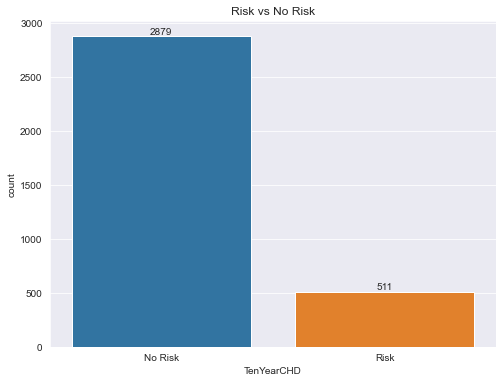

In [84]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=data['TenYearCHD'])
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['No Risk', 'Risk'])
plt.title('Risk vs No Risk')
plt.show()

### Chart 2: Age Distribution

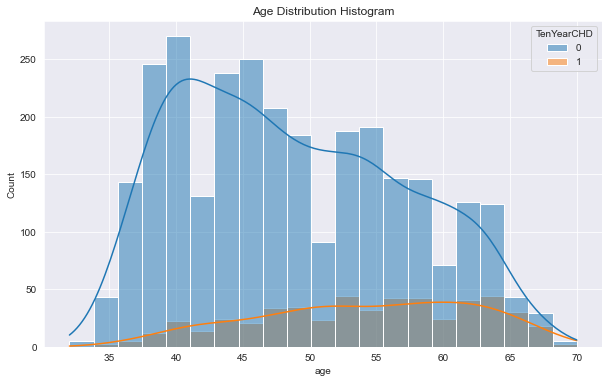

In [138]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='TenYearCHD', kde=True)
plt.title('Age Distribution Histogram')
plt.show()

Inference
- As the age increases the risk of Coronary Heart Disease increases.
- Highest Risk is between the age 40 to 65

### Chart 3: Total Cholestrol Distribution

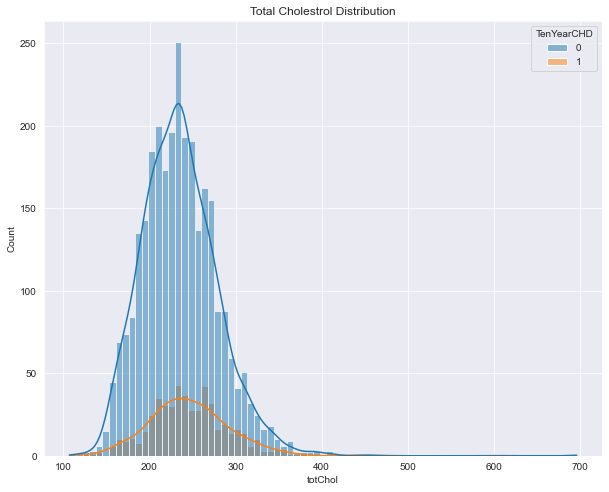

In [145]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='totChol', hue='TenYearCHD', kde=True)
plt.title('Total Cholestrol Distribution')
plt.show()

Inference
- Even though most common range of total cholestrol lies between 200-300. The risk of Coronary Heart Diseases sharply increases for people with Cholestrol levels > 200

### Chart 4: BMI Distribution

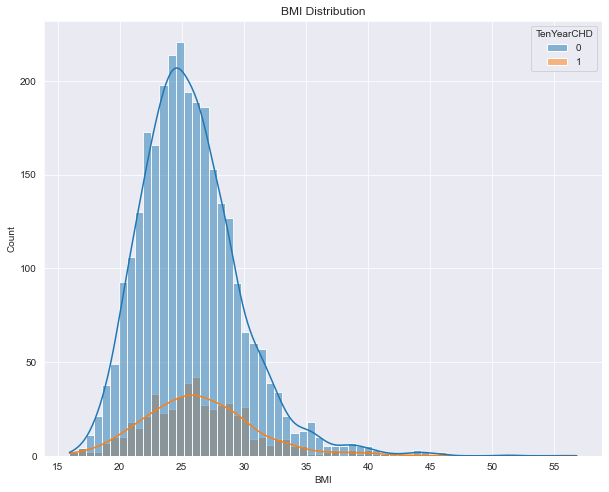

In [146]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='BMI', hue='TenYearCHD', kde=True)
plt.title('BMI Distribution')
plt.show()

Inference
- Even though most common range of BMI lies between 20-30. The risk of Coronary Heart Diseases sharply increases for people with BMI > 20

### Chart 5: Diabetes Risk vs No Risk

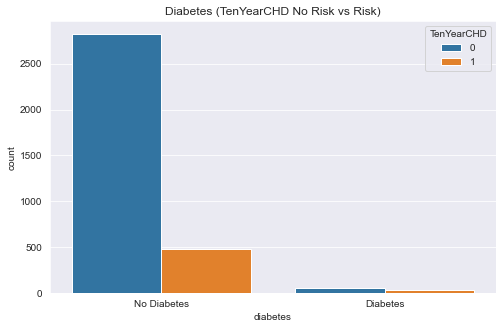

In [143]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='diabetes', hue='TenYearCHD')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])
plt.title('Diabetes (TenYearCHD No Risk vs Risk)')
plt.show()

Inference
- No clear correlation found between people with diabetes with risk of coronary heart disease

### Chart 6: Non Smokers vs Smokers

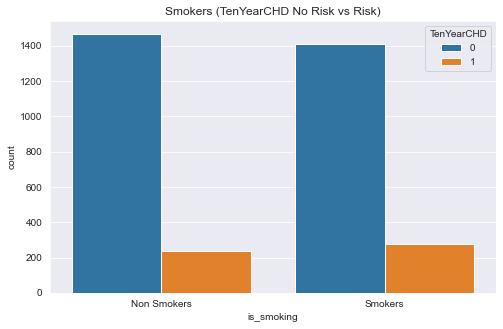

In [144]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='is_smoking', hue='TenYearCHD')
ax.set_xticklabels(['Non Smokers', 'Smokers'])
plt.title('Smokers (TenYearCHD No Risk vs Risk)')
plt.show()

Inference
- From the above plot, it is clear that smokers have a slightly higher chances of contracting a coronary heart disease

### Chart 7: Heart Rate Distribution

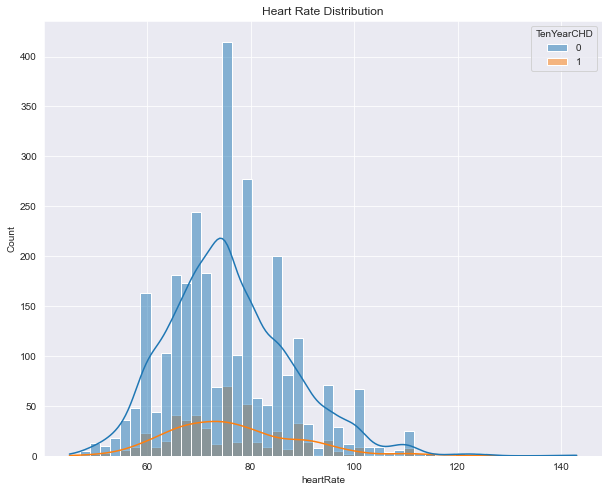

In [150]:
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='heartRate', hue='TenYearCHD', kde=True)
plt.title('Heart Rate Distribution')
plt.show()

Inference
- No clear correlation found between Heart Rate and coronary heart disease. 

### Chart 8: Glucose level Distribution

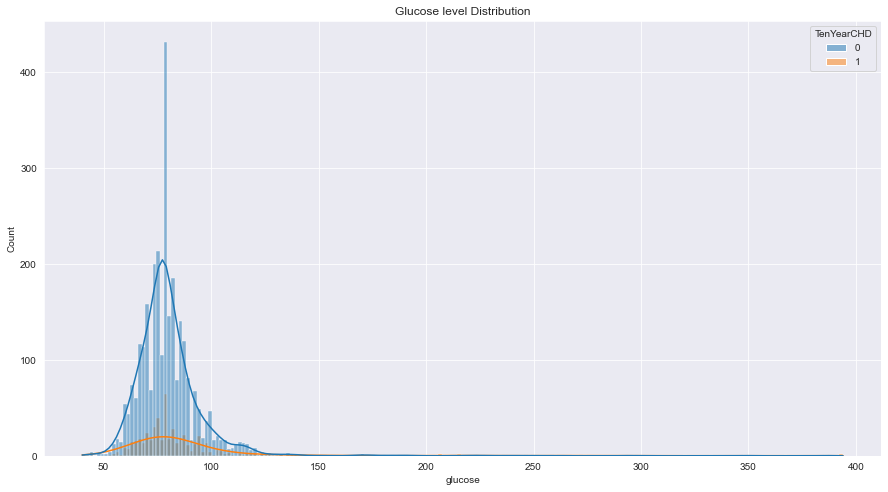

In [153]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data, x='glucose', hue='TenYearCHD', kde=True)
plt.title('Glucose level Distribution')
plt.show()

Inference
- No clear correlation found between glucose levels and coronary heart disease. 

### Chart 9: Boxplot 

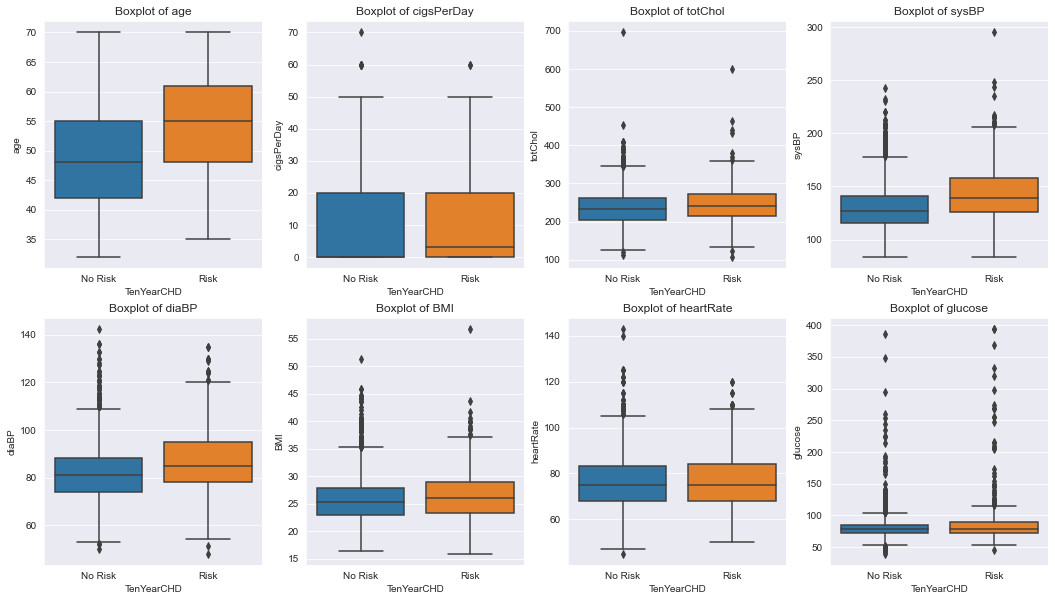

In [161]:
columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 
           'diaBP', 'BMI', 'heartRate', 'glucose']

a = 2 # rows
b = 4 # columns
c = 1 # counter

plt.figure(figsize=(18, 10))

for col in columns:
    plt.subplot(a, b, c)
    ax = sns.boxplot(data=data, x='TenYearCHD', y=col)
    ax.set_xticklabels(['No Risk', 'Risk'])
    plt.title(f'Boxplot of {col}')
    c+=1
plt.show()

Inference
- People with an average age of 55 have a higher chance of contracting a coronary heart disease when compared to the other ages.
- People with coronary heart disease tend to smoke 3 cigarettes on average.
- People with coronary heart disease have higher systolic and diastolic blood pressure when compared to people who do not have any CHD.
- The variables 'totalChol', 'sysBP', 'diaBP', 'BMI', 'heartRate' and 'gluclose' have outliers which need to be addressed to make a robust ML model.

### Chart 10: Pairplot

<Figure size 1080x576 with 0 Axes>

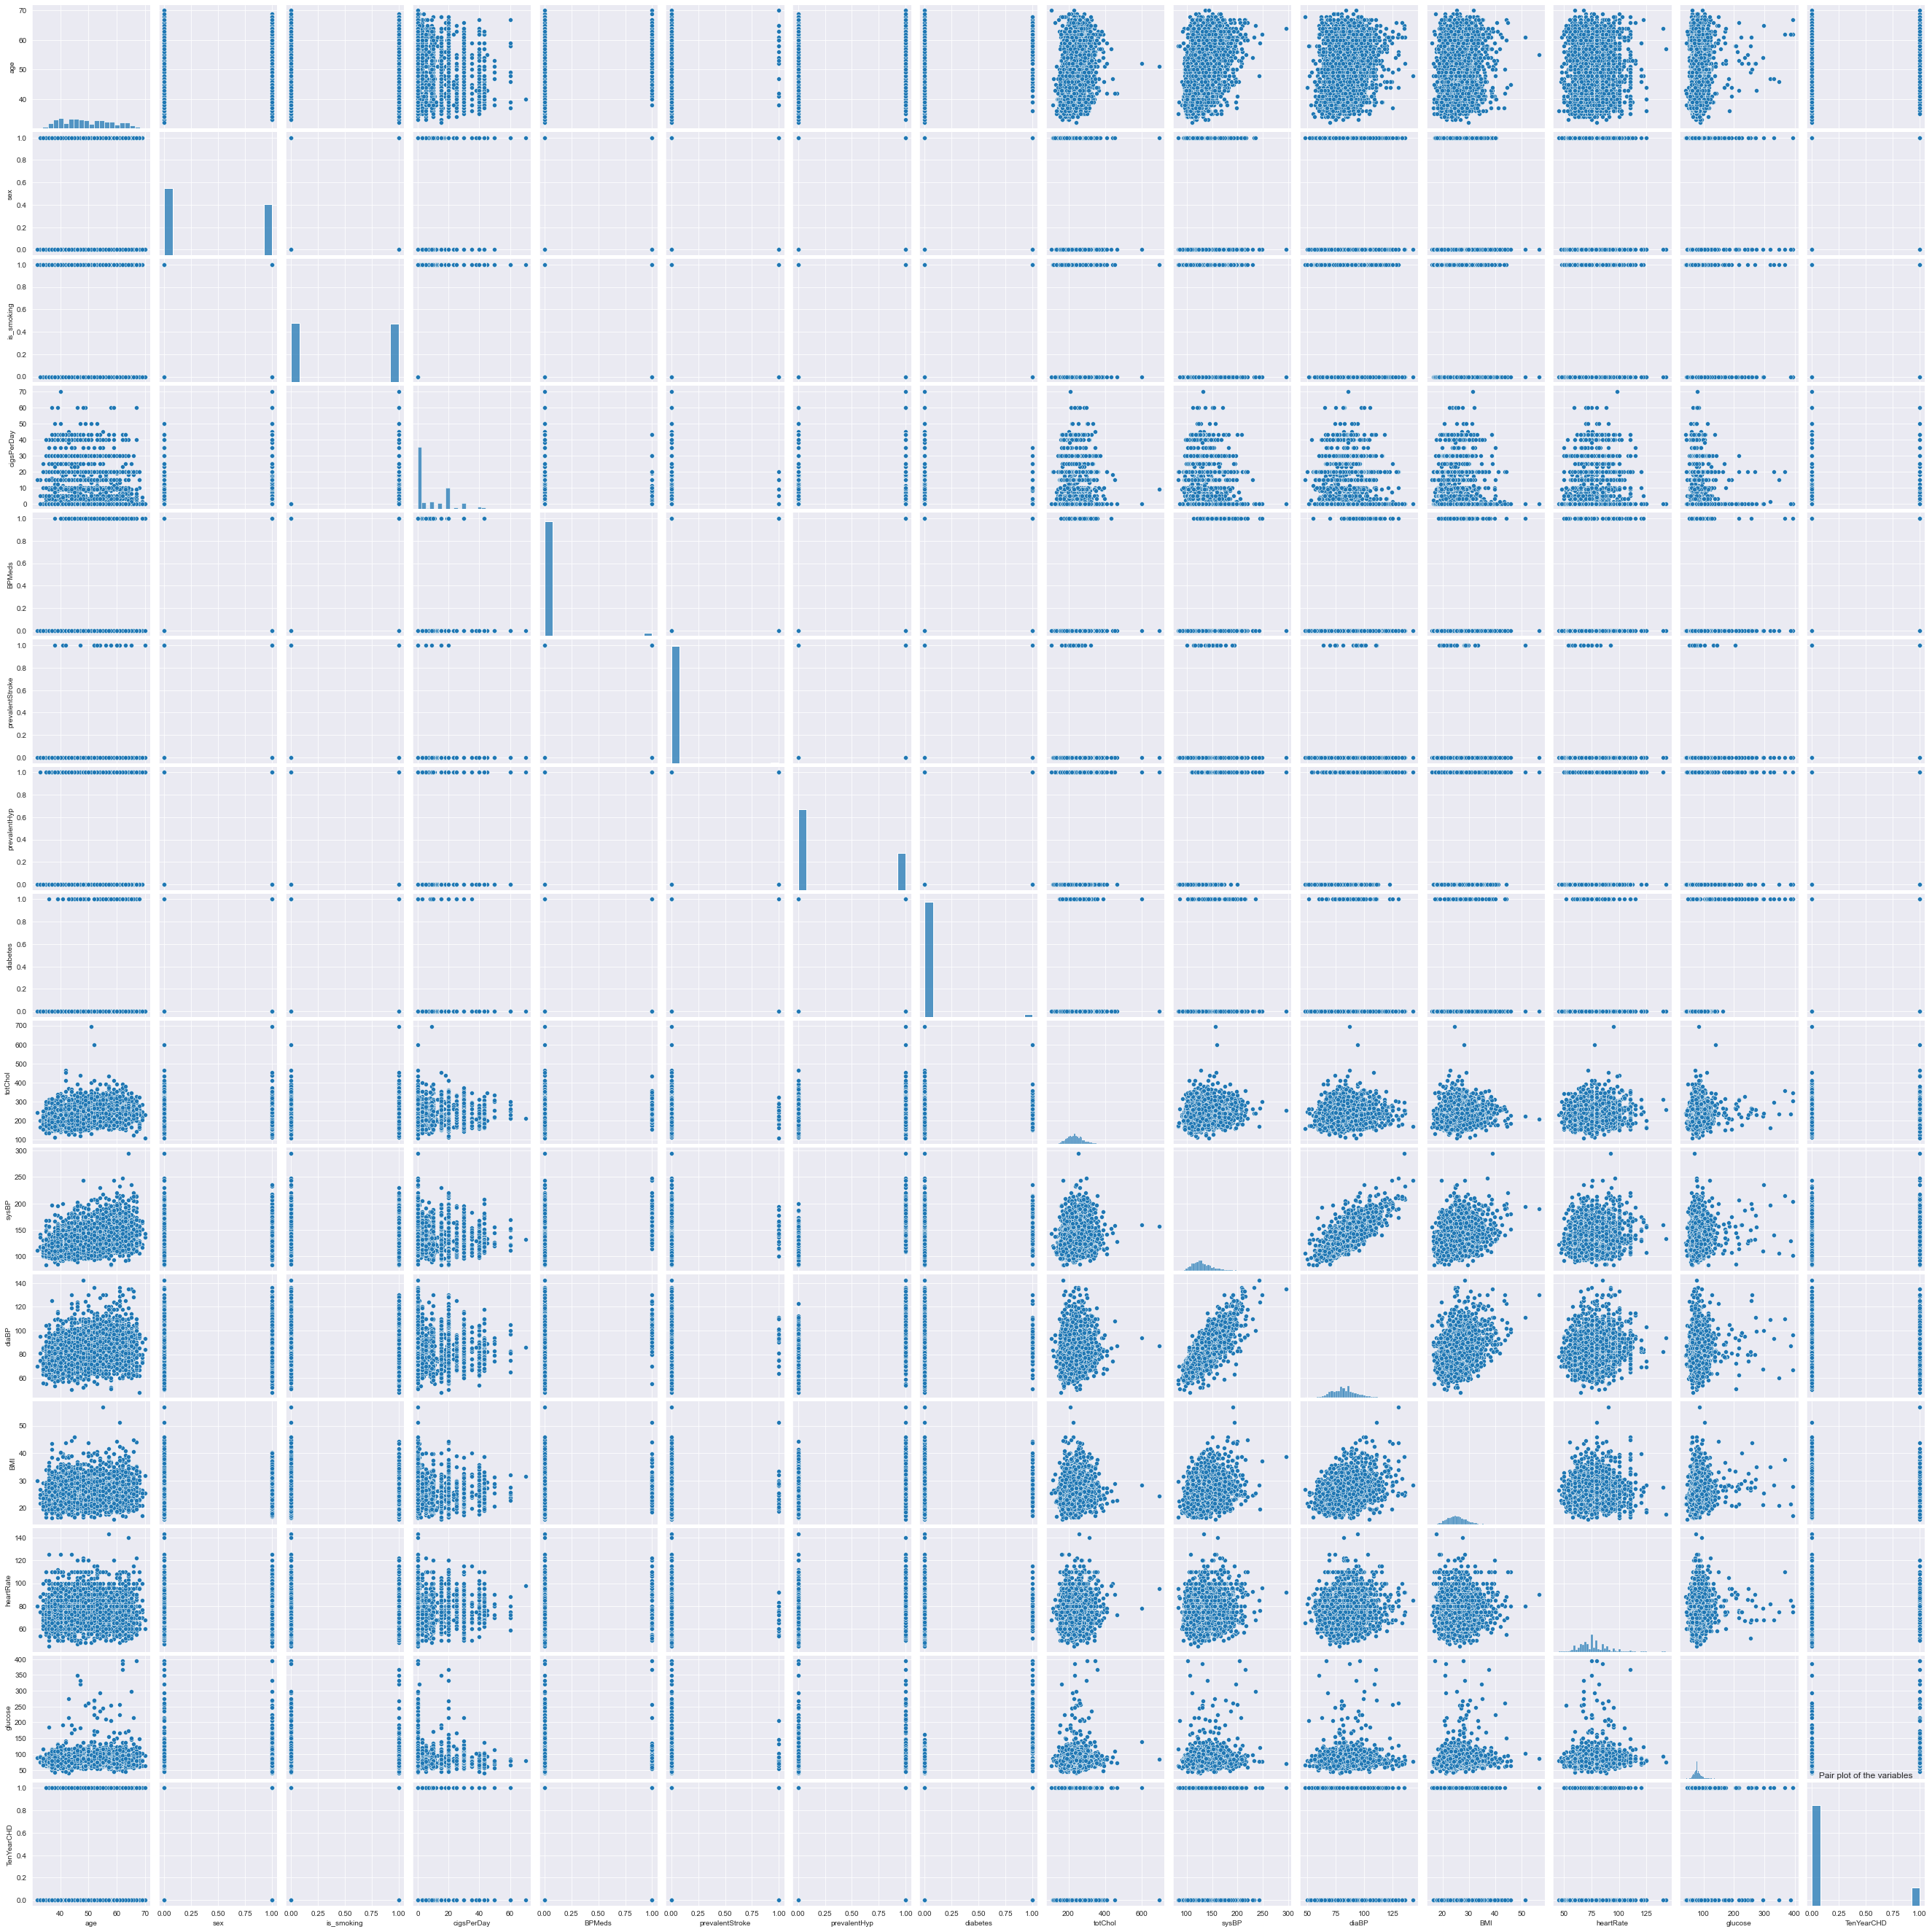

In [166]:
plt.figure(figsize=(15, 8))
sns.pairplot(data)
plt.title("Pair plot of the variables")
plt.show()

### Chart 11: Heatmap

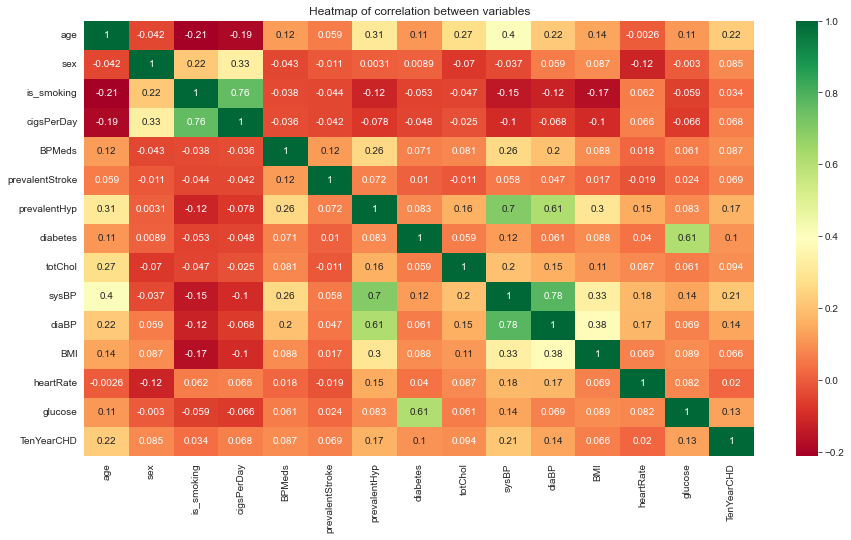

In [164]:
corr = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.title('Heatmap of correlation between variables')
plt.show()

Inference
- High correlation between Blood Pressure (systolic blood pressure, diastolic blood pressure) and prevalent hypertension
- High correlation between diabetes and glucose levels
- High correlation between smokers and cigsPerDay

Application
- Can drop is_smoking variable as it is highly correlated with cigsPerDay variable
- Can drop diastolic BP variable as according to the domain knowledge, systolic BP is often looked at by the doctor.

## 5. Hypothesis Testing

### Handling missing values

In [37]:
data = data.drop(labels='education', axis=1)

data['glucose'] = data['glucose'].fillna(data['glucose'].median())

data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())

data['totChol'] = data['totChol'].fillna(data['totChol'].median())

data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mode()[0])

data['BMI'] = data['BMI'].fillna(data['BMI'].median())

Justification
- No information provided regarding education column in the dataset description. Hence dropping the variable to avoid any inaccurate assumptions.
- Replacing glucose column missing values with its median value to avoid skewing of data.
- Replacing heartRate column missing values with its median value to avoid skewing of data.
- Replacing totChol column missing values with its median value to avoid skewing of data.
- Replacing BMI column missing values with its median value to avoid skewing of data.
- Replacing BPMeds column missing values with its mode value as it is most probable assumption.
- Replacing cigsPerDay column missing values with its mode value as it is most probable assumption.

### Converting sex to binary {0: Female, 1: Male}

In [31]:
data['sex'] = data.sex.apply(lambda x: 1 if x == 'M' else 0)

### Converting Smoking to binary {0: NO, 1: YES}

In [32]:
data['is_smoking'] = data['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)